In [26]:
# Note to self - to install a package globally, pip install it,
# then run jupyter notebook again

'''
Kelly Criterion
Expected Value of Game = (Probability(Win) - Probability(Loss)) * Size of Bet > 0

The available capital after n rounds of game is:
c(n) = c(0) * (1+f)^h - (1+f)^t
where
c(n) = capital at round n
h = probability of win
t = probability of loss 
f = fraction of capital to commit

So the closed form log-return maximization problem becomes:
r(g) = (h/n) * log(1+f) + (t/n) * log(1+f)
i.e. the sum of the product winning probability divided by the number of trials and the product of 
the losing probability divided by the number of trials

So the f term is the maximization of the expected value of the rate of growth, which is the function G(f)
E[h] = n * p
E[t] = n * q

Then 
E[r^g] = p * log(1+f) + q * log(1+f)
= G(f)

Taking the first derivative of G(f):
G'(f) = (p/1+f) - (q/1+f)
= (p - pf - q - qf)/((1+f)*(1-f))
= (p - q - f)/ ((1+f)*(1-f))
or the quotient of (trails * win fraction) - (trails * loss fraction) - (fraction) and the product (1 + fraction)
and (1 - fraction)

so finally the optimal fraction is:
f(n) = p - q
REAL NUMBER TIME!
If win chance = 55 &
lose change = 45
55 - 45 = 10, so invest 10% of capital per bet,

of course, constraining for max position size in any given security

Let's do it in code:
'''

"\nKelly Criterion\nExpected Value of Game = (Probability(Win) - Probability(Loss)) * Size of Bet > 0\n\nThe available capital after n rounds of game is:\nc(n) = c(0) * (1+f)^h - (1+f)^t\nwhere\nc(n) = capital at round n\nh = probability of win\nt = probability of loss \nf = fraction of capital to commit\n\nSo the closed form log-return maximization problem becomes:\nr(g) = (h/n) * log(1+f) + (t/n) * log(1+f)\ni.e. the sum of the product winning probability divided by the number of trials and the product of \nthe losing probability divided by the number of trials\n\nSo the f term is the maximization of the expected value of the rate of growth, which is the function G(f)\nE[h] = n * p\nE[t] = n * q\n\nThen \nE[r^g] = p * log(1+f) + q * log(1+f)\n= G(f)\n\nTaking the first derivative of G(f):\nG'(f) = (p/1+f) - (q/1+f)\n= (p - pf - q - qf)/((1+f)*(1-f))\n= (p - q - f)/ ((1+f)*(1-f))\nor the quotient of (trails * win fraction) - (trails * loss fraction) - (fraction) and the product (1 + f

In [32]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import plt

In [46]:
np.random.seed(1000)
plt.style.use('seaborn')
%matplotlib inline

In [34]:
# Monte Carlo time!
p = 0.55
f = p  - (1 - p) # has to add to 1

In [35]:
f

0.10000000000000009

In [36]:
I = 50 # trials
n = 50 # bets per trial

In [37]:
# f is p(win) == win - (1 - win) == win - loss
def run_simulation(f):
    c = np.zeros((n, I)) # zeros matrix surface n = rows I = columns
    c[0] = 100 # initial capital is par
    for i in range(I):
        for t in range(1, n):
            o = np.random.binomial(1, p) # digitize the wins/losses against the probability of win
            if o > 0:
                c[t, i] = (1 + f) * c[t-1, i] # winrar
            else:
                c[t, i] = (1-f) * c[t-1, i] # loss
    return c

In [38]:
c_1 = run_simulation(f)

In [39]:
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  , 110.  , 110.  , ..., 110.  , 110.  , 110.  ],
       [ 99.  ,  99.  , 121.  , ..., 121.  , 121.  ,  99.  ],
       ...,
       [106.7 , 194.81, 130.41, ..., 106.7 ,  47.81,  87.3 ],
       [117.37, 175.33, 143.45, ...,  96.03,  52.59,  78.57],
       [129.1 , 192.86, 129.1 , ...,  86.42,  57.85,  86.42]])

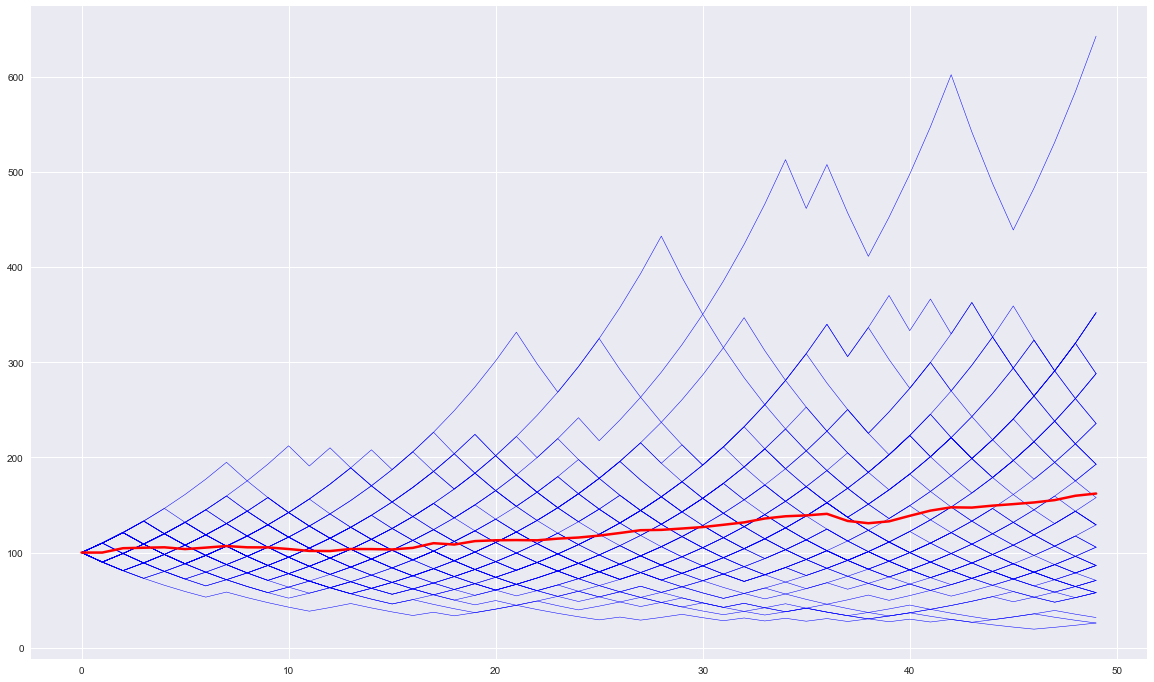

In [40]:
plt.figure(figsize=(20,12))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5);

In [41]:
c_2 = run_simulation(0.05)

In [42]:
c_3 = run_simulation(0.25)

In [43]:
c_4 = run_simulation(0.5)

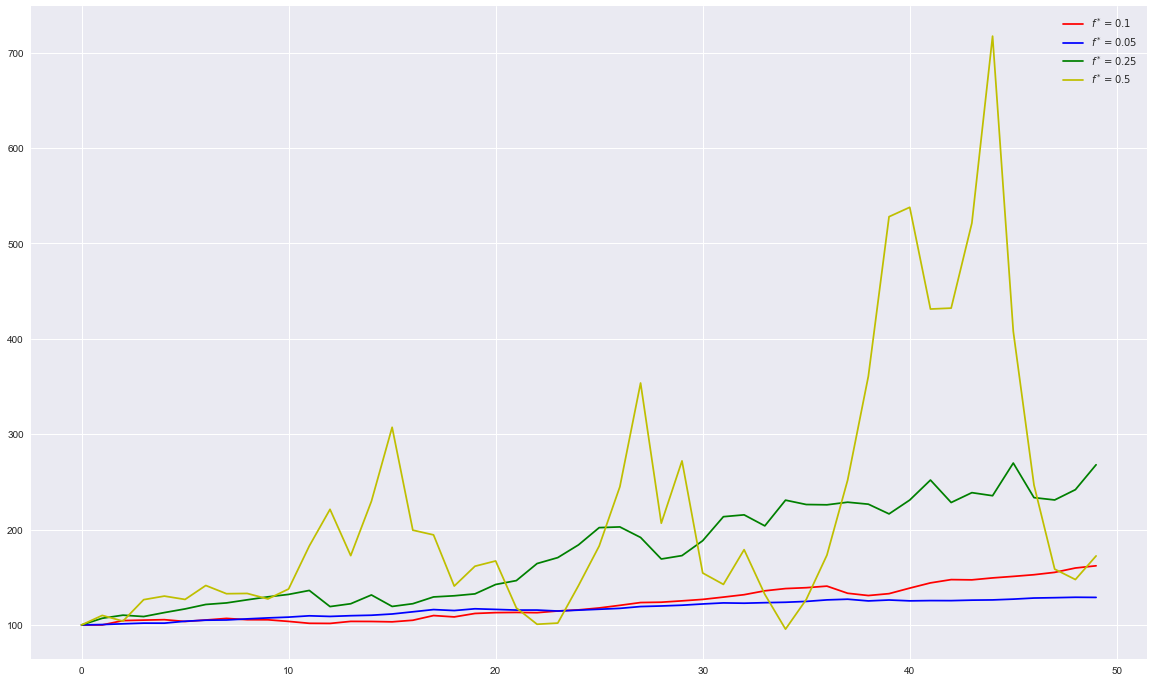

In [56]:
plt.figure(figsize=(20,12))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f^*=0.05$')
plt.plot(c_3.mean(axis=1), 'g', label='$f^*=0.25$')
plt.plot(c_4.mean(axis=1), 'y', label='$f^*=0.5$')
plt.legend(loc=0)

In [57]:
'''
Dot Products: for element A[0][c], sum up A[0][c] * B[r][0] for r in A
i.e. hold the row constant for matrix 1, hold the column constant for matrix 2
'''
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2,3],[3,4,5],[5,6,7]])

In [58]:
'''
Expand on Kelly Criterion for stocks and indices
Assume a binominal outcome one year in the future:
P(r(s) = (mean + volatility)) = P(r(s) = (mean - volatility)) = 1/2
E[r(s)] = Expected return of stock over period
where (volatility > 0)
SO:
Available capital afte one year is:
c(f) = c(0) * ((1 + (1-f) * r) + (f * r(s)))

1-f = p(loss)
f = p (win)
r = risk free rate

i.e. starting capital * ((the loss probability * the risk free rate) + (the win rate * the expected return))

# maximizing the geometric growth rate (annualized returns) is:
G(f) = expected value(log(c(f)/c(0))
the log of the output of the above formula/starting capital

assuming there are n trading days in the period from c(0) to c(1):
P(r(s)[i]) = (mean/n) + (volatility/sqrt(n)) = P(r(s)[i] = (mean/n) - (volaitily/sqrt(n))) = 1/2

Note that volatility increases as the number of trading days increases

So C(f)[i] = c(0) * Geometric Product((1 + (1-f)) * ((r/n) + f * r(s)[i]))

Finally, after expanding this formula and rearranging, the optimal fraction is:
f* = (mean - risk free rate)/volatility^2

i.e. the mean of log returns - risk free rate divided by the return variance
'''

'\nExpand on Kelly Criterion for stocks and indices\nAssume a binominal outcome one year in the future:\nP(r(s) = (mean + volatility)) = P(r(s) = (mean - volatility)) = 1/2\nE[r(s)] = Expected return of stock over period\nvolatility expected volatility\nSO:\nAvailable capital afte one year is:\nc(f) = c(0) * ((1 + (1-f) * r) + (f * r(s)))\n\n1-f = p(loss)\nf = p (win)\nr = risk free rate\n\n'

This is the imaginary identity
$$e^{i\pi} + 1 = 0$$

In [60]:
raw = pd.read_csv('/Users/thomasmurphy/PycharmProjects/PythonFinanceRetry/notebooks/tr_eikon_eod_data.csv',
                          index_col=0, parse_dates=True

In [61]:
# let's do a real example, assuming the strat under consideration is a passive replication of $SPX

In [62]:
symbol = '.SPX'
data = pd.DataFrame(raw[symbol])

In [71]:
data['returns'] = np.log(data / data.shift(1))
data.dropna(inplace=True)
data.tail()

/Users/thomasmurphy/.conda/envs/PythonFinanceRetry/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/thomasmurphy/.conda/envs/PythonFinanceRetry/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,.SPX,returns
Date,,
2018-06-25,2717.07,-0.013820
2018-06-26,2723.06,0.002202
2018-06-27,2699.63,-0.008642
2018-06-28,2716.31,0.006160
2018-06-29,2718.37,0.000758


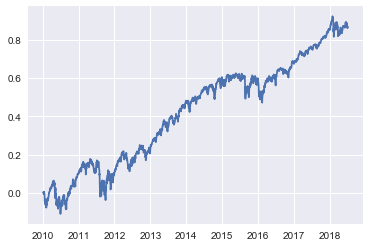

In [74]:
plt.plot(data['returns'].cumsum())

In [75]:
'''
The Kelly Criterion suggests a higher % of capital invested the higher the expected return and lower the volatility
(see term structure above)
''' 
# number of trading days
mu = data.returns.mean() * 252
mu

0.10622728349115117

In [78]:
# square root of the standard deviation times trading days
sigma = data.returns.std() * 252 ** 0.5
sigma

0.15008838981519787

In [79]:
# toy risk free rate
r = 0.0

In [81]:
f = (mu-r) / sigma ** 2
f

4.715653419049394

In [87]:
equs = []
# Take all index entries from 2nd to the end
data.index[1:]


DatetimeIndex(['2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
               '2010-01-15', '2010-01-20', '2010-01-21', '2010-01-22',
               '2010-01-25', '2010-01-26',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='Date', length=2057, freq=None)

In [117]:
equs = []
def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    # initial capital is 1
    data[equ] = 1
    # multiply capital by output of function f
    data[cap] = data[equ] * f
    # idx number, index point
    for i,t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        data.loc[t, cap] = data[cap].loc[t_1] * \
                                     math.exp(data['returns'].loc[t])
        data.loc[t, equ] = data[cap].loc[t] - \
                                     data[cap].loc[t_1] + \
                                     data[equ].loc[t_1]
        data.loc[t, cap] = data[equ].loc[t] * f

In [118]:
kelly_strategy(f * 0.5)
kelly_strategy(f * 0.66)
kelly_strategy(f)

In [119]:
print(data[equs].tail())

            equity_2.36  equity_3.11  equity_4.72
Date                                             
2018-06-25     5.703986     7.997327    11.418602
2018-06-26     5.733636     8.052199    11.537310
2018-06-27     5.617315     7.836566    11.069186
2018-06-28     5.699149     7.987263    11.391700
2018-06-29     5.709339     8.006116    11.432440


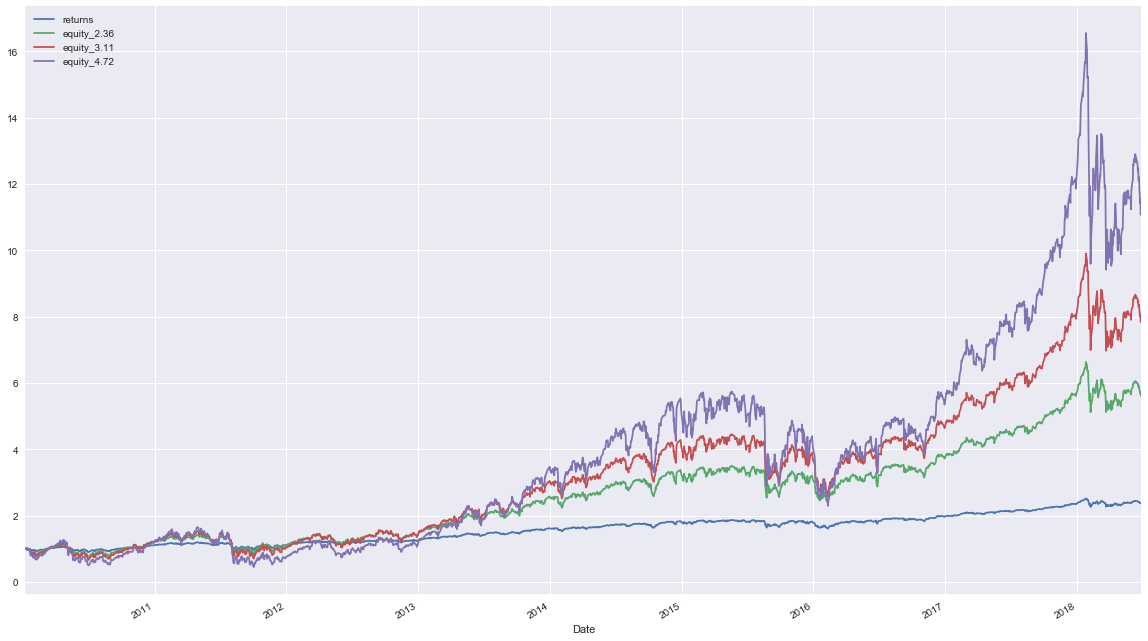

In [122]:
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True, figsize=(20,12))
data[equs].plot(ax=ax, legend=True)
'''
Applying the full Kelly f* often leads to super erratic returns (equity_4.72), so one often applies a fraction of
Kelly (2/3 Kelly or 1/2 Kelly) for less volatility
'''


In [126]:
'''
General approach for trend-following strategy:
1. Transform data to binary approach to show momentum
2. Train ML model on binary data
3. Avoid overfitting with k-folds
'''

'\nGeneral approach for trend-following strategy:\n1. Transform data to binary approach to show momentum\n2. Train ML model on binary data\n3. Avoid overfitting with k-folds\n'

In [127]:
'''
General approach for mean-reversion strategy:
1. Determine strategy for mean-reversion threshold (the old one was short when over 3sigma, long when below 3sigma)
2. Optimize this over the number of lags to generate sigma against
3. Transform data to binary approach to show momentum
4. Train ML model on binary data
5. Avoid overfitting with k-folds
'''

'\nGeneral approach for mean-reversion strategy:\n1. Determine strategy for mean-reversion threshold (the old one was short when over 3sigma, long when below 3sigma)\n2. Transform data to binary approach to show momentum\n3. Train ML model on binary data\n4. Avoid overfitting with k-folds\n'

In [129]:
'''
Hit Ratio: the number of winning trades as a fraction of all trade
Any Hit Ratio (net transaction costs) > 0.5 is edge, and should be traded on
''' 

'\nHit Ratio: the number of winning trades as a fraction of all trade\nAny Hit Ratio (net transaction costs) > 0.5 is edge, and should be traded on\n'